In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

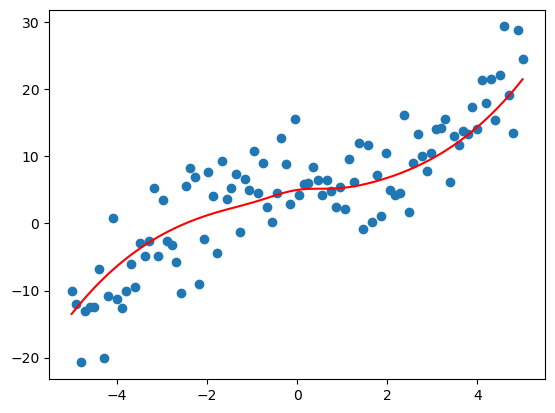

In [2]:
# Create a noisy dataset using a 3rd degree polynomial
x = np.linspace(-5, 5, 100)
f = lambda x: 0.1*x**3 + 0.2**x**2 + x + 4
y = f(x) + 0.05*np.random.normal(0, 100, 100)

plt.plot(x, y, 'o')
plt.plot(x, f(x), 'r')

In [3]:
# Create a train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [11]:
# First layer of models

lr = LinearRegression()
lr.fit(x_train.reshape(-1, 1), y_train)

dt = DecisionTreeRegressor(max_depth=5)
dt.fit(x_train.reshape(-1, 1), y_train)

DecisionTreeRegressor(max_depth=5)

In [12]:
# Train and test errors using sklearn.metrics.mean_squared_error
from sklearn.metrics import mean_squared_error

print('Train error LR: ', mean_squared_error(y_train, lr.predict(x_train.reshape(-1, 1))))
print('Test error LR: ', mean_squared_error(y_test, lr.predict(x_test.reshape(-1, 1))))

print('Train error DT: ', mean_squared_error(y_train, dt.predict(x_train.reshape(-1, 1))))
print('Test error DT: ', mean_squared_error(y_test, dt.predict(x_test.reshape(-1, 1))))


Train error LR:  27.924071980667883
Test error LR:  31.370985589163144
Train error DT:  7.7087183209724515
Test error DT:  35.43235725855944


In [13]:
# Second layer of models

# Create a new dataset with the predictions of the first layer

x_train2 = np.column_stack((lr.predict(x_train.reshape(-1, 1)), dt.predict(x_train.reshape(-1, 1))))
x_test2 = np.column_stack((lr.predict(x_test.reshape(-1, 1)), dt.predict(x_test.reshape(-1, 1))))

lr2 = LinearRegression()
lr2.fit(x_train2, y_train)


LinearRegression()

In [14]:
# Coefficent corrspding to first layer linear regression and decision tree
print('Coefficients: ', lr2.coef_)
print('Intercept: ', lr2.intercept_)

print("Linear layer 1 weight: ", lr2.coef_[0])
print("DT layer 1 weight: ", lr2.coef_[1])

Coefficients:  [0.01939882 0.98501677]
Intercept:  -0.022676558751247633
Linear layer 1 weight:  0.019398815335920406
DT layer 1 weight:  0.9850167701100284


In [15]:
# Train and test errors using sklearn.metrics.mean_squared_error for the second layer

print('Train error LR2: ', mean_squared_error(y_train, lr2.predict(x_train2)))
print('Test error LR2: ', mean_squared_error(y_test, lr2.predict(x_test2)))


Train error LR2:  7.702633375890798
Test error LR2:  35.17218794357514


In [16]:
# Now, use a feature set with the predictions of the first layer and the original features

x_train3 = np.column_stack((x_train, lr.predict(x_train.reshape(-1, 1)), dt.predict(x_train.reshape(-1, 1))))
x_test3 = np.column_stack((x_test, lr.predict(x_test.reshape(-1, 1)), dt.predict(x_test.reshape(-1, 1))))

lr3 = LinearRegression()
lr3.fit(x_train3, y_train)

# Train and test errors using sklearn.metrics.mean_squared_error for the second layer

print('Train error LR3: ', mean_squared_error(y_train, lr3.predict(x_train3)))
print('Test error LR3: ', mean_squared_error(y_test, lr3.predict(x_test3)))


Train error LR3:  7.702633375890798
Test error LR3:  35.17218794357517


In [17]:
lr3.coef_

array([0.00607321, 0.01726212, 0.98501677])